In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
#from ultralytics import YOLO

In [3]:
%cd drive/MyDrive/Travail/Ingé/2A/Cours/IGN/Programmes/YOLOv10/Dataset/
HOME = os.getcwd()
print(HOME)
%ls

[Errno 2] No such file or directory: 'drive/MyDrive/Travail/Ingé/2A/Cours/IGN/Programmes/YOLOv10/Dataset/'
/home/ecarrasco/Documents/IGN/IGN-remote/Programmes/YOLOv10/Dataset
/home/ecarrasco/Documents/IGN/IGN-remote/Programmes/YOLOv10/Dataset
DataAugmentor/  FrameExtractor/  ImageUpgrader/  test_frames/
datasets_RF/    ImageCisors/     result_frames/  YOLOfromRobotflow.ipynb


### Install YOLOv10

In [ ]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


### Install Robotflow and supervision
On installe Robotflow pour pouvoir télécharger le dataset d'entrainement depuis l'univers Robotflow. On installe supervision qui nous permettra de visualiser les résultats.

In [ ]:
!pip install -q supervision roboflow

On se place dans le bon dossier

In [4]:
#!mkdir {HOME}/datasets_RF/ # A décomenté à la creation du notebook
%cd {HOME}/datasets_RF/
print(HOME)

/home/ecarrasco/Documents/IGN/IGN-remote/Programmes/YOLOv10/Dataset/datasets_RF
/home/ecarrasco/Documents/IGN/IGN-remote/Programmes/YOLOv10/Dataset


### Download dataset from Robotflow

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="0y44LYnl73DnveDEYurR")

project = rf.workspace("geodancehive").project("geodancehive-beedataset")
version = project.version(2)
dataset = version.download("yolov8") # format compatible YOLOv10


loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to GeoDanceHive-BeeDataset-2 in yolov8:: 100%|██████████| 1834/1834 [00:14<00:00, 128.79it/s]


In [ ]:
%cd datasets_RF/
%ls
print(HOME)

/content/drive/MyDrive/Travail/Ingé/2A/Cours/IGN/Programmes/YOLOv10/Dataset/datasets_RF
GeoDanceHive-BeeDataset-1/  runs/       yolov10m.pt
GeoDanceHive-BeeDataset-2/  yolo11n.pt  yolov10n.pt
/content/drive/MyDrive/Travail/Ingé/2A/Cours/IGN/Programmes/YOLOv10/Dataset


### Lancer l'entrainement de YOLO

In [ ]:
from ultralytics import YOLO

model = YOLO('runs/detect/train/weights/best.pt')

dataset_path = os.path.join(HOME, "GeoDanceHive-BeeDataset-2", "data.yaml")
print(dataset_path)

results = model.train(
    data=dataset_path,
    epochs=75,
    batch=16,
    plots=True,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


KeyboardInterrupt: 

### Résultats de l'entrainement

##### Matrice de confusion

/content/drive/MyDrive/Travail/Ingé/2A/Cours/IGN/Programmes/YOLOv10/Dataset/datasets_RF/runs/detect/train


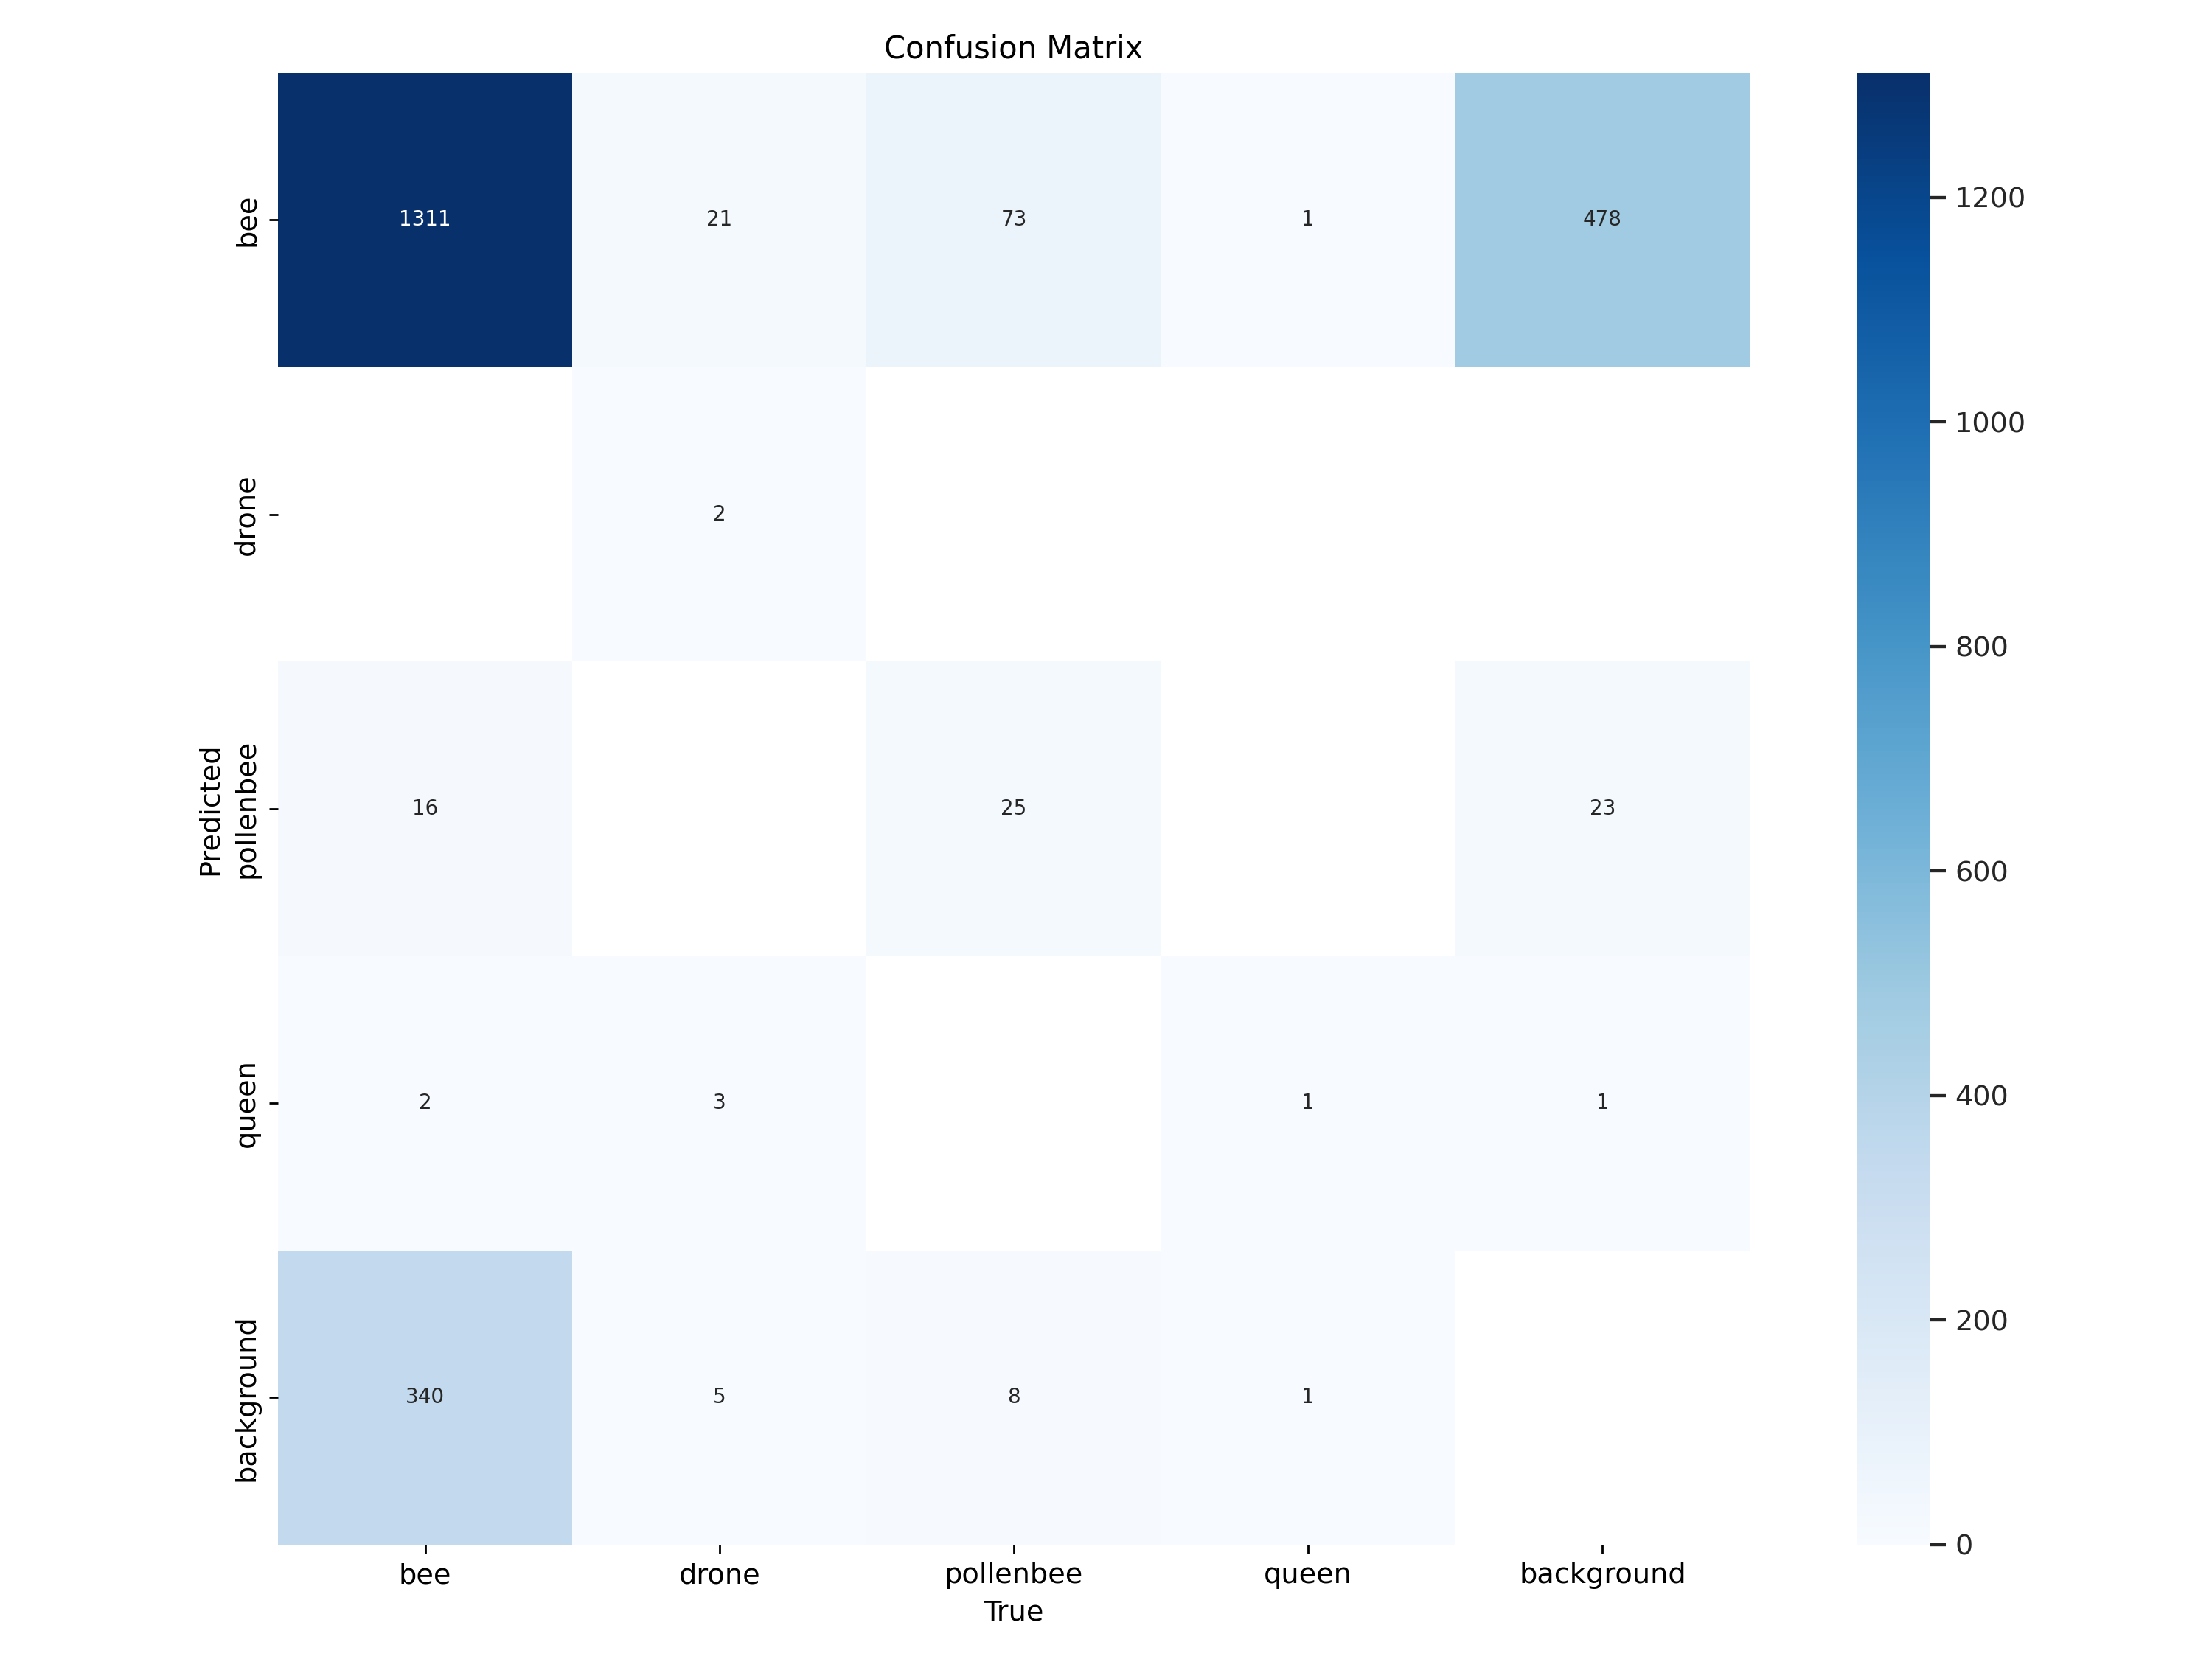

In [ ]:
from IPython.display import Image

#!ls
%cd runs/detect/train
Image(filename='confusion_matrix.png', width=600)

##### Résultats

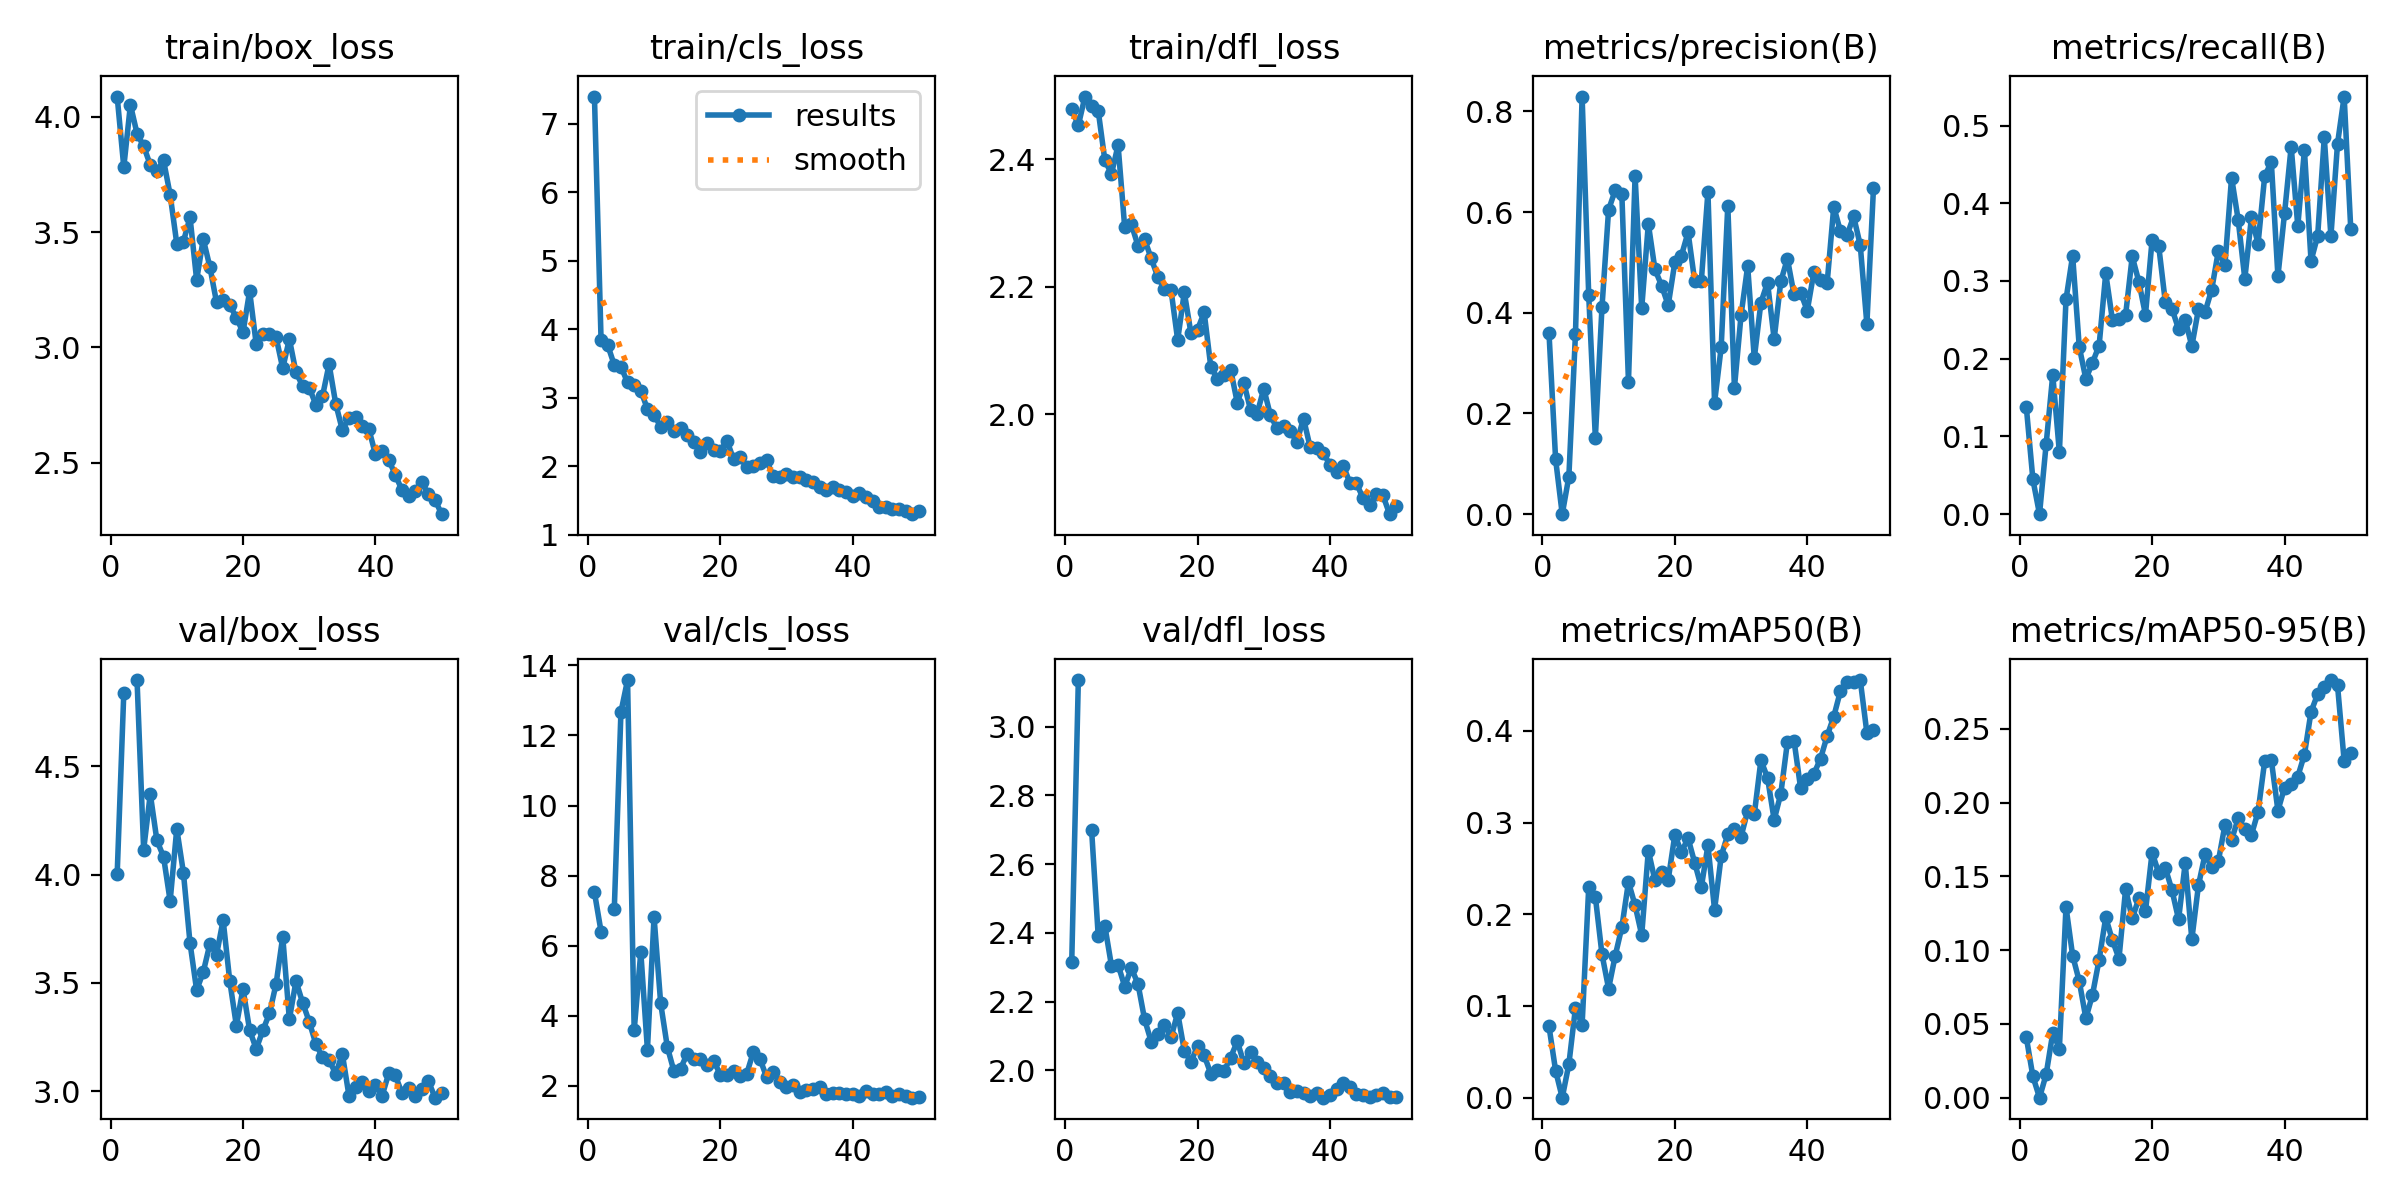

In [ ]:
Image(filename='results.png', width=800)

### Inférence du nouveau modèle

In [7]:
%cd ..

/home/ecarrasco/Documents/IGN/IGN-remote/Programmes/YOLOv10


In [5]:
%cd {HOME}
!ls

/home/ecarrasco/Documents/IGN/IGN-remote/Programmes/YOLOv10/Dataset
DataAugmentor  FrameExtractor  ImageUpgrader  test_frames
datasets_RF    ImageCisors     result_frames  YOLOfromRobotflow.ipynb


In [12]:
import torch
from ultralytics.nn.tasks import DetectionModel
from ultralytics import YOLO
from torch.serialization import safe_globals

checkpoint_path = "/home/ecarrasco/Documents/IGN/IGN-remote/Programmes/YOLOv10/Calculateur/Modèles/best001.pt"

with safe_globals([DetectionModel]):
    # Charger le checkpoint "manuellement"
    ckpt = torch.load(checkpoint_path, map_location='cpu', weights_only=False)

# Ensuite, reconstruire le modèle à partir du checkpoint
model = YOLO(ckpt)

# Ou si ça ne marche pas directement, tu peux tenter:
# model = YOLO(checkpoint_path)

image_path = 'Dataset/test_frames/essaim-sur-cadre.jpg'
results = model(image_path)
results[0].show()


TypeError: argument should be a str or an os.PathLike object where __fspath__ returns a str, not 'dict'